## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
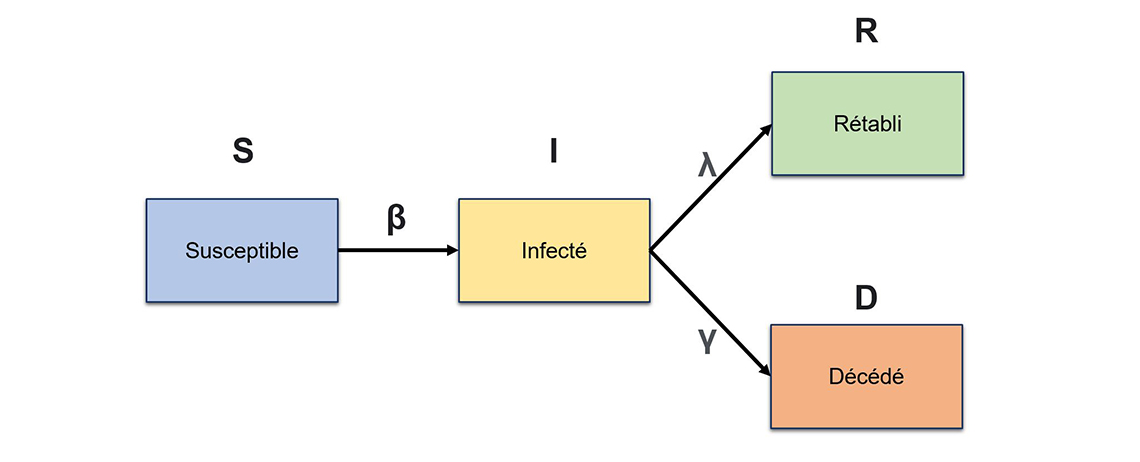


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [19]:
import numpy as np
import pandas as pd
def euler(beta, gamma, mu,  S0, I0,R0,D0,step,days):
    S=[S0]
    R=[R0]
    I=[I0]
    D=[D0]
    dt = 1/step
    nb_steps = step*days
    for _ in range(nb_steps):
        S.append(S[-1] - S[-1]*beta*I[-1]*dt)
        I.append(I[-1] +dt * (beta*S[-1]*I[-1] - gamma*I[-1] - mu*I[-1]) )
        R.append(R[-1] + dt*gamma*I[-1])
        D.append(D[-1] +dt * mu * I[-1] )


    return np.array(S),np.array(I),np.array(R),np.array(D)


### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [20]:
beta = 0.5     
gamma = 0.15   
mu = 0.015     
S0 = 0.99      
I0 = 0.01      
R0 = 0.0       
D0 = 0.0       
steps_per_day = 100
days = 89
S, I, R, D = euler(beta, gamma, mu, S0, I0, R0, D0, steps_per_day, days)

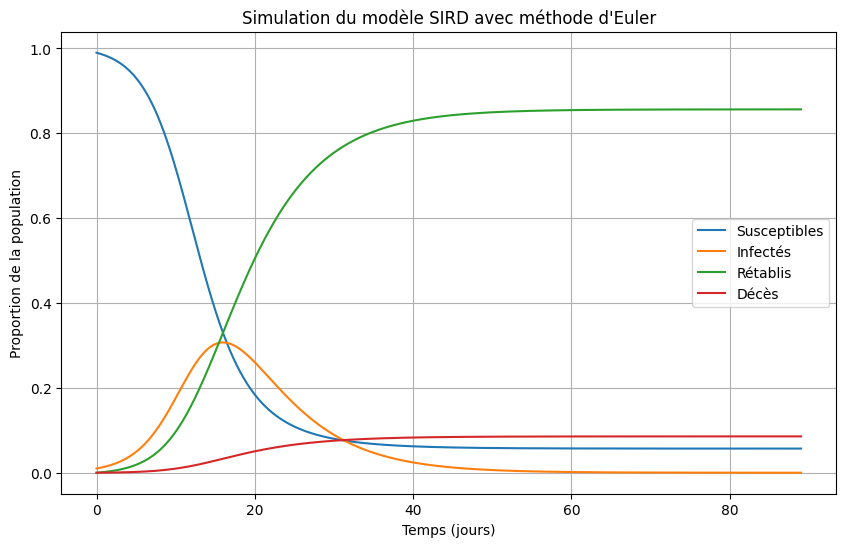

In [21]:
import matplotlib.pyplot as plt

t = np.linspace(0, days, len(S))
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptibles')
plt.plot(t, I, label='Infectés')
plt.plot(t, R, label='Rétablis')
plt.plot(t, D, label='Décès')
plt.xlabel('Temps (jours)')
plt.ylabel('Proportion de la population')
plt.legend()
plt.title('Simulation du modèle SIRD avec méthode d\'Euler')
plt.grid(True)
plt.show()

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [22]:
import pandas as pd

df = pd.read_csv('sird_dataset.csv')
df

,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,-0.002455,-0.004622
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,-0.001515
3,3,0.988132,0.008969,-0.006308,0.003571
4,4,0.971090,0.007307,0.005403,0.004894
...,...,...,...,...,...
85,85,0.072998,0.004650,0.829414,0.079243
86,86,0.077714,-0.005786,0.846965,0.085430
87,87,0.073599,0.010464,0.844571,0.084902
88,88,0.074212,0.004219,0.836580,0.076309


In [26]:
def cost_function(params, S_data, I_data, R_data, D_data, steps_per_day, days):
    """La Cross-Entropy Catégorique (CCE) est effectivement utilisée pour les tâches de classification où l'objectif est de prédire des étiquettes catégoriques à partir d'un ensemble de classes possibles. Dans de telles tâches, chaque échantillon dans le jeu de données appartient à une classe spécifique parmi plusieurs classes possibles."""
    beta, gamma, mu = params
    S0, I0, R0, D0 = S_data[0], I_data[0], R_data[0], D_data[0]
    S, I, R, D = euler(beta, gamma, mu, S0, I0, R0, D0, steps_per_day, days)

    mse = np.mean((S[::steps_per_day] - S_data)**2 +
                  (I[::steps_per_day] - I_data)**2 +
                  (R[::steps_per_day] - R_data)**2 +
                  (D[::steps_per_day] - D_data)**2)
    return mse
print(cost_function(params, S_data, I_data, R_data, D_data, steps_per_day, days))



0.04824376156304507


In [27]:
from itertools import product

beta_values = np.linspace(0.25, 0.5, 10)
gamma_values = np.linspace(0.08, 0.15, 10)
mu_values = np.linspace(0.005, 0.015, 10)

best_params = None
best_cost = float('inf')

for beta, gamma, mu in product(beta_values, gamma_values, mu_values):
    params = (beta, gamma, mu)
    cost = cost_function(params, S_data, I_data, R_data, D_data, steps_per_day, days)
    if cost < best_cost:
        best_cost = cost
        best_params = params

print(f"Meilleurs paramètres: beta={best_params[0]}, gamma={best_params[1]}, mu={best_params[2]}")


Meilleurs paramètres: beta=0.3611111111111111, gamma=0.11888888888888888, mu=0.012777777777777777


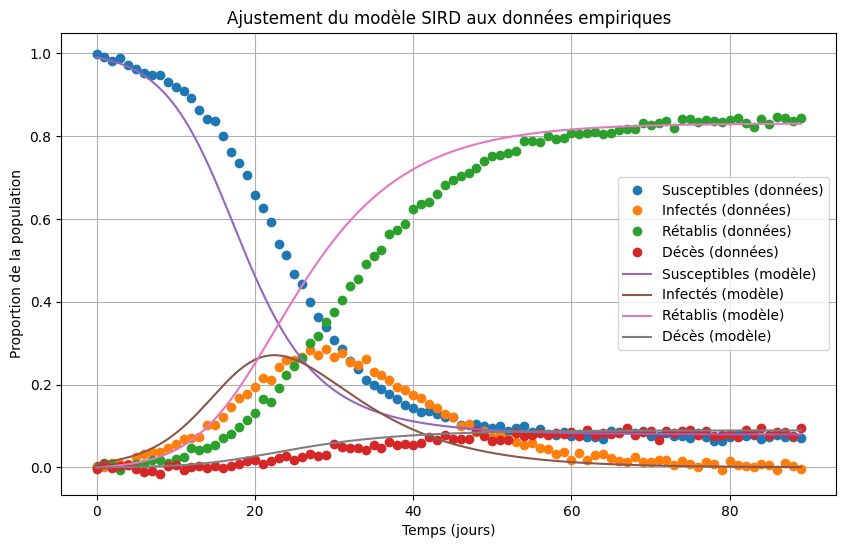

In [28]:
S_opt, I_opt, R_opt, D_opt = euler(best_params[0], best_params[1], best_params[2], S0, I0, R0, D0, steps_per_day, days)

plt.figure(figsize=(10, 6))
plt.plot(t_data, S_data, 'o', label='Susceptibles (données)')
plt.plot(t_data, I_data, 'o', label='Infectés (données)')
plt.plot(t_data, R_data, 'o', label='Rétablis (données)')
plt.plot(t_data, D_data, 'o', label='Décès (données)')
plt.plot(t, S_opt, label='Susceptibles (modèle)')
plt.plot(t, I_opt, label='Infectés (modèle)')
plt.plot(t, R_opt, label='Rétablis (modèle)')
plt.plot(t, D_opt, label='Décès (modèle)')
plt.xlabel('Temps (jours)')
plt.ylabel('Proportion de la population')
plt.legend()
plt.title('Ajustement du modèle SIRD aux données empiriques')
plt.grid(True)
plt.show()

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1.

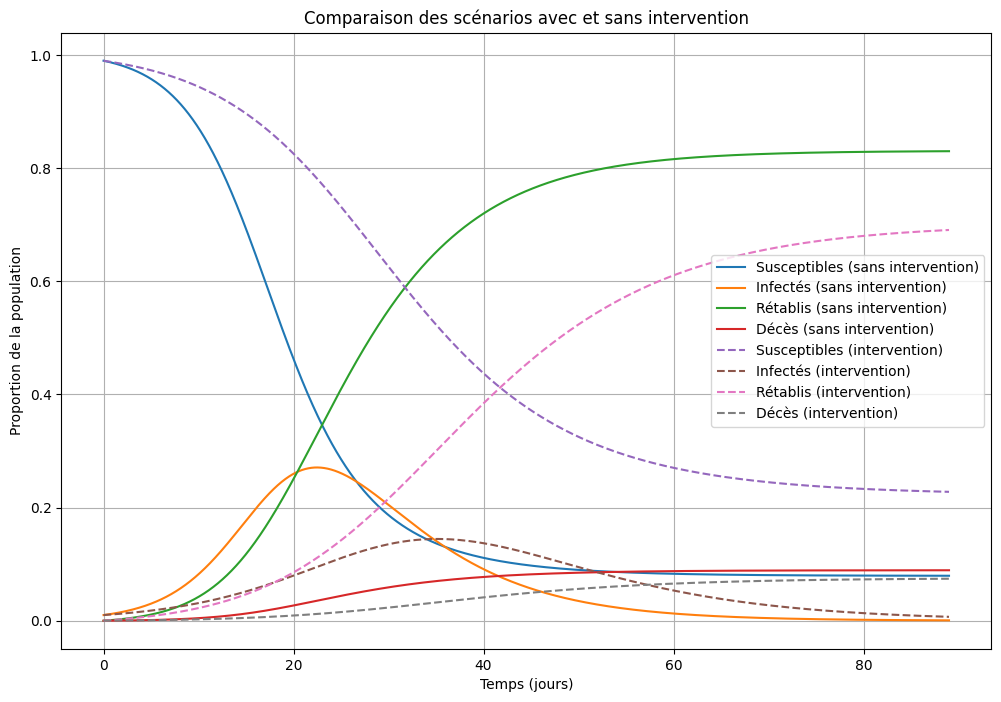

In [29]:
beta_reduced = best_params[0] * 0.7  # Réduction de 30%
S_int, I_int, R_int, D_int = euler(beta_reduced, best_params[1], best_params[2], S0, I0, R0, D0, steps_per_day, days)

# Comparaison des deux scénarios
t = np.linspace(0, days, len(S_opt))
plt.figure(figsize=(12, 8))
plt.plot(t, S_opt, label='Susceptibles (sans intervention)')
plt.plot(t, I_opt, label='Infectés (sans intervention)')
plt.plot(t, R_opt, label='Rétablis (sans intervention)')
plt.plot(t, D_opt, label='Décès (sans intervention)')
plt.plot(t, S_int, '--', label='Susceptibles (intervention)')
plt.plot(t, I_int, '--', label='Infectés (intervention)')
plt.plot(t, R_int, '--', label='Rétablis (intervention)')
plt.plot(t, D_int, '--', label='Décès (intervention)')
plt.xlabel('Temps (jours)')
plt.ylabel('Proportion de la population')
plt.legend()
plt.title('Comparaison des scénarios avec et sans intervention')
plt.grid(True)
plt.show()

3.